In [6]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
%matplotlib inline

In [7]:
#importing files in pandas dataframe
train = pd.read_csv('train.csv',header=0)
trainOrig = train
test = pd.read_csv('test.csv',header = 0)
testOrig = test
labels = train['label']
labelsOrig = labels
train.drop('label',axis=1, inplace =True)
#test shape =(28000,784), train shape =(42000,784), labels shape = (42000,1)

In [8]:
#Converting dataframes into numpy arrays
train = train.as_matrix()
test = test.as_matrix()
labels = labels.as_matrix()

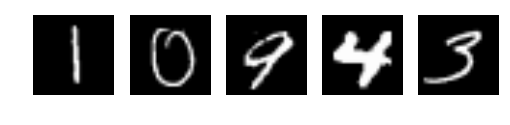

Labels: [1, 0, 9, 4, 3]


In [9]:
#Visualization of few random hand written digits
fig = plt.figure()
randLabels = []
for i in range(1,6):
    k = random.randrange(0,42000,10)
    ax = fig.add_subplot(1,5,i)
    ax.imshow(train[k,:].reshape(28,28),'gray')
    ax.axis('off')
    randLabels.append(labels[k])
plt.show()
print('Labels: {}'.format(randLabels))

In [10]:
#PreProcessing(Data Compression)
pca = PCA()
pca.fit(train)
VarianceRatio = pca.explained_variance_ratio_

In [11]:
#Finding number of principal components
#Retaining 85% of total variance 
TotVar = 0 
for idx, Var in enumerate(VarianceRatio):
    TotVar += Var 
    if(TotVar>=0.85): 
        break 
print('Total Retained Variance: {}'.format(TotVar)) 
print('Number of principal components {}'.format(idx))

Total Retained Variance: 0.8508641804646783
Number of principal components 58


In [12]:
#Again fitting pca for 42 principal components
pcaRed = PCA(n_components = 58,whiten= True)
pcaRed.fit(train)
#Compressing training and testing data using fitted data
train = pcaRed.transform(train)
test = pcaRed.transform(test)

In [13]:
#Cross-validation split
(trainX, validX, trainY, validY) = train_test_split(train,labels, test_size = 0.2)

In [19]:
clf = MLPClassifier(hidden_layer_sizes =(500,) , activation ='logistic' , solver = 'sgd', alpha = 0.001, batch_size = 400, learning_rate ='constant',learning_rate_init = 0.2 , shuffle =True , verbose =True ,max_iter =500,tol = 1e-8)
clf.fit(trainX,trainY)

Iteration 1, loss = 4.26760378
Iteration 2, loss = 0.32227282
Iteration 3, loss = 0.29629039
Iteration 4, loss = 0.27925470
Iteration 5, loss = 0.26250056
Iteration 6, loss = 0.24369550
Iteration 7, loss = 0.22336271
Iteration 8, loss = 0.20652717
Iteration 9, loss = 0.18919785
Iteration 10, loss = 0.17279717
Iteration 11, loss = 0.15958012
Iteration 12, loss = 0.14686163
Iteration 13, loss = 0.13475862
Iteration 14, loss = 0.12491385
Iteration 15, loss = 0.11601017
Iteration 16, loss = 0.10804458
Iteration 17, loss = 0.10036061
Iteration 18, loss = 0.09400237
Iteration 19, loss = 0.08813785
Iteration 20, loss = 0.08262713
Iteration 21, loss = 0.07761619
Iteration 22, loss = 0.07316524
Iteration 23, loss = 0.06903447
Iteration 24, loss = 0.06532519
Iteration 25, loss = 0.06161470
Iteration 26, loss = 0.05824136
Iteration 27, loss = 0.05512802
Iteration 28, loss = 0.05244449
Iteration 29, loss = 0.04988246
Iteration 30, loss = 0.04746735
Iteration 31, loss = 0.04487906
Iteration 32, los

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.001, batch_size=400, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.2, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-08, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [20]:
#cross validation report
predsValid = clf.predict(validX)
predsTrain = clf.predict(trainX)
print (classification_report(validY, predsValid))
print('The training accuracy is:', accuracy_score(trainY, predsTrain))
print ('The cross-validation accuracy is:', accuracy_score(validY, predsValid))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       863
          1       0.99      0.99      0.99       922
          2       0.97      0.97      0.97       820
          3       0.98      0.96      0.97       884
          4       0.98      0.98      0.98       806
          5       0.97      0.97      0.97       759
          6       0.98      0.98      0.98       799
          7       0.97      0.98      0.98       889
          8       0.96      0.96      0.96       792
          9       0.97      0.96      0.96       866

avg / total       0.98      0.97      0.97      8400

The training accuracy is: 1.0
The cross-validation accuracy is: 0.975


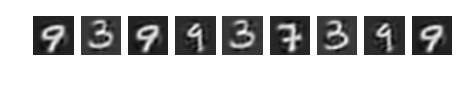

Predicted Labels: [9, 3, 9, 9, 3, 7, 3, 9, 9]
Original Labels: [9, 3, 9, 9, 3, 7, 3, 9, 9]


In [21]:
#Visualization of few random hand written digits from cross validation set
fig = plt.figure()
LabelsPred = []
LabelsOrig = []
for i in range(1,10):
    k = random.randrange(0,validX.shape[1],10)
    ax = fig.add_subplot(1,10,i)
    ax.imshow(pcaRed.inverse_transform(validX[k,:]).reshape(28,28),'gray')
    ax.axis('off')
    LabelsPred.append(predsValid[k])
    LabelsOrig.append(validY[k])
plt.show()
print('Predicted Labels: {}'.format(LabelsPred))
print('Original Labels: {}'.format(LabelsOrig))

In [22]:
#using classifier to predict test images on public leader board
#Training classifier on whole set of images
clf.fit(train,labels)
pred = dbn.predict(test)
dfPred = pd.read_csv('sample_submission.csv',header=0)
dfPred['Label']= pd.DataFrame(pred)
dfPred.to_csv('mySubmission.csv', index=False)
#98.186% LeaderBoard Accuracy 

Iteration 1, loss = 3.45267969
Iteration 2, loss = 0.30670177
Iteration 3, loss = 0.28365305
Iteration 4, loss = 0.26085523
Iteration 5, loss = 0.23760028
Iteration 6, loss = 0.21546892
Iteration 7, loss = 0.19523123
Iteration 8, loss = 0.17763891
Iteration 9, loss = 0.16119380
Iteration 10, loss = 0.14760900
Iteration 11, loss = 0.13466610
Iteration 12, loss = 0.12488590
Iteration 13, loss = 0.11471050
Iteration 14, loss = 0.10588865
Iteration 15, loss = 0.09824705
Iteration 16, loss = 0.09174092
Iteration 17, loss = 0.08588568
Iteration 18, loss = 0.07983442
Iteration 19, loss = 0.07526245
Iteration 20, loss = 0.07076038
Iteration 21, loss = 0.06640203
Iteration 22, loss = 0.06269671
Iteration 23, loss = 0.05891458
Iteration 24, loss = 0.05594325
Iteration 25, loss = 0.05317584
Iteration 26, loss = 0.05018322
Iteration 27, loss = 0.04761985
Iteration 28, loss = 0.04510951
Iteration 29, loss = 0.04317040
Iteration 30, loss = 0.04082861
Iteration 31, loss = 0.03898747
Iteration 32, los

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


NameError: name 'dbn' is not defined